In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

from oceantracker import main

from oceantracker.post_processing.read_output_files import load_output_files 
from oceantracker.post_processing.plotting import plot_statistics
from oceantracker.post_processing.plotting import stats_plot 


In [9]:
path_to_dir = '/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12'

In [10]:
cases = load_output_files.get_case_info_files_from_dir(path_to_dir)

In [11]:
import json
def load_polycounts_adhoc(cases, case_number):
    
    with open(cases[case_number]) as f:
        case_info = json.load(f)
        stats_file_names = case_info['output_files']['particle_statistics']
        stats_file_paths = [os.path.join(os.path.dirname(cases[case_number]), item) for item in stats_file_names]
        
    counts = []
    for item in stats_file_paths:
        print(item)
        with nc.Dataset(item) as df:
            print(df.variables.keys())
            counts.append(np.array(df.variables['count'])[:])



    return counts

counts = load_polycounts_adhoc(cases, 0)

/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C001_stats_polygon_time_001.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group'])
/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C001_stats_polygon_time_002.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group'])
/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C001_stats_polygon_time_003.nc
dict_keys(['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group'])


In [12]:
np.array(counts).shape

(3, 525541, 1, 13)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
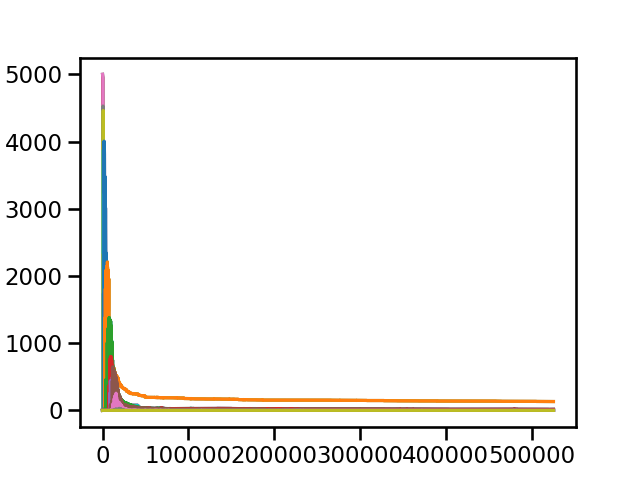

In [13]:
%matplotlib widget
for item in np.array(counts):
    plt.plot(np.sum(item,axis=1))

In [14]:
np.array(counts)[0] == np.array(counts)[1]

SyntaxError: unmatched ')' (3625080190.py, line 1)

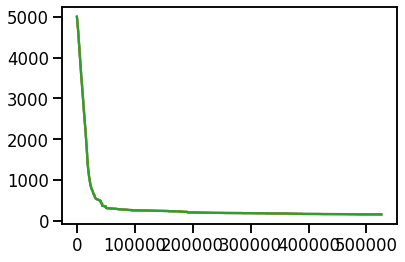

In [ ]:
for item in np.array(counts):
    plt.plot(item)

['time', 'num_released', 'count', 'count_all_particles', 'number_released_each_release_group']


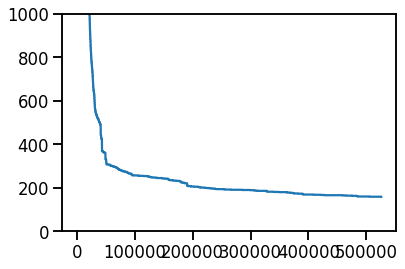

In [ ]:


with nc.Dataset('/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C001_stats_polygon_time_001.nc') as df:
    print(list(df.variables))
    # plt.plot(df.variables['count_all_particles'][:])
    plt.plot(df.variables['count_all_particles'][:,0])
    plt.ylim(0, 1000)

In [15]:
df1 = '/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C021_stats_polygon_time_001.nc'
df2 = '/scratch/local1/output/22_12_08_retention_v12/22_12_08_retention_v12/22_12_08_retention_v12_C021_stats_polygon_time_002.nc'

In [24]:
moving = nc.Dataset(df1).variables['count'][:,0,:].sum(axis=1)
all = nc.Dataset(df1).variables['count_all_particles'][:,0]
stranded = nc.Dataset(df2).variables['count'][:,0,:].sum(axis=1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
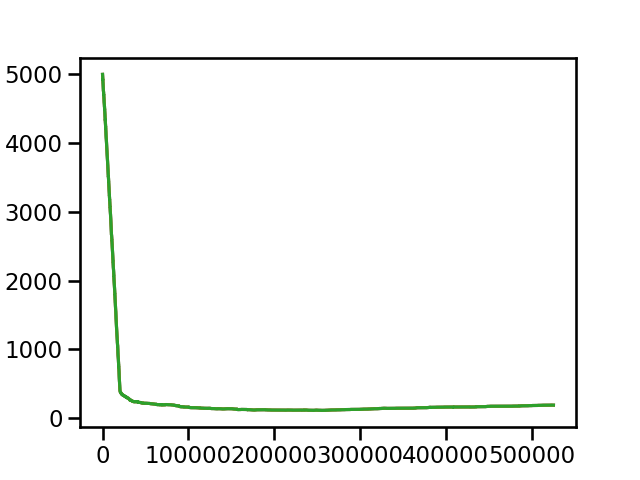

In [25]:
plt.figure()
plt.plot(moving)
plt.plot(stranded)
plt.plot(all)
plt.show()